In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

# 生成半环形数据

X, y = make_moons(n_samples=100, noise=0.1, random_state=1)
moonAxe=[-1.5, 2.5, -1, 1.5]

In [2]:
# 显示数据样本

def dispData(x, y, moonAxe):
    pos_x0 = [x[i,0] for i in range(len(y)) if y[i]==1]
    pos_x1 = [x[i,1] for i in range(len(y)) if y[i]==1]
    neg_x0 = [x[i,0] for i in range(len(y)) if y[i]==0]
    neg_x1 = [x[i,1] for i in range(len(y)) if y[i]==0]
    
    plt.plot(pos_x0, pos_x1, "bo")
    plt.plot(neg_x0, neg_x1, "r^")
    
    plt.axis(moonAxe)
    plt.xlabel("x")
    plt.ylabel("y")

In [3]:
# 显示决策线

def dispPredict(clf, moonAxe):
    # 生成区间内的数据
    d0 = np.linspace(moonAxe[0], moonAxe[1], 200)
    d1 = np.linspace(moonAxe[2], moonAxe[3], 200)
    x0, x1 = np.meshgrid(d0, d1)
    X = np.c_[x0.ravel(), x1.ravel()]
    
    # 进行预测并绘制预测结果
    y_pred = clf.predict(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, alpha=0.8)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


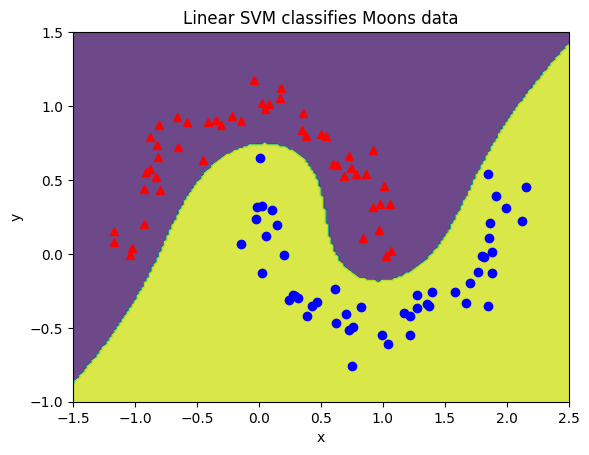

In [4]:
# 1.显示样本
dispData(X, y, moonAxe)

# 2.构建模型组合，整合三个函数
polynomial_svm_clf = Pipeline(
    (("multiFeature", PolynomialFeatures(degree=3)),
     ("NumScale", StandardScaler()),
     ("SVC", LinearSVC(C=100)))
)
    
# 3.使用模型组合进行训练
polynomial_svm_clf.fit(X,y)

# 4.显示分类线
dispPredict(polynomial_svm_clf, moonAxe)

# 5.显示图表标题
plt.title('Linear SVM classifies Moons data')
plt.show()